# Ensemble Learning

---
## Theory


---
### 1. Can we use Bagging for regression problems?
- Yes, Bagging can be used for both classification and regression problems. In regression, a Bagging Regressor aggregates the predictions by averaging the outputs of multiple base regressors.

---
###2. What is the difference between multiple model training and single model training?
- Single model training uses one algorithm to learn the data, whereas multiple model training (ensemble methods) combines several models to improve performance, stability, and generalization.

---
###3. Explain the concept of feature randomness in Random Forest.
- In Random Forest, feature randomness means that at each split in a decision tree, a random subset of features is considered instead of all features. This helps in making the trees more diverse and reduces correlation among them.

---
###4. What is OOB (Out-of-Bag) Score?
- OOB Score is an internal validation score used in ensemble methods like Bagging or Random Forest. It uses samples not selected in the bootstrap sample (out-of-bag) to evaluate model accuracy, acting like a built-in cross-validation.

---
###5. How can you measure the importance of features in a Random Forest model?
- Random Forest measures feature importance based on how much each feature decreases impurity (like Gini index or entropy) across all trees. Features that contribute more to reducing impurity are considered more important.

---
###6. Explain the working principle of a Bagging Classifier.
- A Bagging Classifier builds multiple models (typically decision trees) using random subsets of the training data (with replacement) and combines their predictions via majority voting to produce the final output.

---
###7. How do you evaluate a Bagging Classifier's performance?
- You can evaluate it using metrics like accuracy, precision, recall, F1-score, or confusion matrix on a test set or using the out-of-bag (OOB) score as an internal validation metric.

---
###8. How does a Bagging Regressor work?
- A Bagging Regressor trains multiple regressors on different bootstrapped subsets of the data. Their outputs are then averaged to make the final prediction, reducing variance and improving stability.

---
###9. What is the main advantage of ensemble techniques?
- The main advantage is improved accuracy and generalization. They reduce overfitting, increase robustness, and combine the strengths of multiple models.

---
###10. What is the main challenge of ensemble methods?
- The main challenges include increased computational cost, longer training time, and reduced interpretability compared to individual models.

---
###11. Explain the key idea behind ensemble techniques.
- Ensemble techniques combine predictions from multiple models to create a more accurate and robust overall model. The idea is that a group of weak learners can perform better together than individually.

---
###12. What is a Random Forest Classifier?
- A Random Forest Classifier is an ensemble model that builds multiple decision trees during training and outputs the mode (majority vote) of their predictions. It introduces randomness in both data (bagging) and features (feature subsetting).

---
###13. What are the main types of ensemble techniques?
The main types are:
- Bagging (Bootstrap Aggregation)
- Boosting (e.g., AdaBoost, Gradient Boosting)
- Stacking (Stacked Generalization)
- Voting (Majority or Weighted Voting)

---
###14. What is ensemble learning in machine learning?
- Ensemble learning is a technique where multiple models (often called "weak learners") are trained and combined to solve the same problem, resulting in better overall performance.

---
###15. When should we avoid using ensemble methods?
Avoid ensemble methods when:
- The base model already performs very well.
- Interpretability is crucial.
- Computational resources are limited.
- Data is too small for effective ensemble training.

---
###16. How does Bagging help in reducing overfitting?
- Bagging reduces overfitting by averaging multiple models trained on different random subsets of data, thus smoothing out the predictions and reducing variance.

---
###17. Why is Random Forest better than a single Decision Tree?
- Random Forest reduces overfitting and improves accuracy by combining the predictions of multiple trees. It introduces both data and feature randomness, leading to more generalized and robust models.

---
###18. What is the role of bootstrap sampling in Bagging?
- Bootstrap sampling randomly selects data points with replacement to create different subsets for training each base model. This ensures diversity among models and reduces variance.

---
###19. What are some real-world applications of ensemble techniques?
- Fraud detection
- Spam filtering
- Credit scoring
- Image classification
- Medical diagnosis
- Stock market prediction

---
###20. What is the difference between Bagging and Boosting?
- Bagging trains models in parallel and reduces variance.
- Boosting trains models sequentially, focusing on correcting previous errors, and reduces bias.
- Bagging is less prone to overfitting; Boosting can overfit if not regularized properly.

---

## Practical

In [3]:
# 21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load sample dataset
X, y = load_iris(return_X_y=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Bagging Classifier with Decision Tree as base estimator (use 'estimator' in newer sklearn versions)
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(),
                                  n_estimators=10,
                                  random_state=42)

# Train the model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred = bagging_model.predict(X_test)

# Evaluate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Classifier Accuracy:", accuracy)



Bagging Classifier Accuracy: 1.0


In [7]:
# 22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load regression dataset
Xr, yr = fetch_california_housing(return_X_y=True)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.3, random_state=42)

# Use DecisionTreeRegressor instead of classifier
bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
bagging_reg.fit(Xr_train, yr_train)
pred = bagging_reg.predict(Xr_test)

# Evaluate
print("Bagging Regressor MSE:", mean_squared_error(yr_test, pred))




Bagging Regressor MSE: 0.28623579601385674


In [8]:
# 23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

Xc, yc = load_breast_cancer(return_X_y=True)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(Xc_train, yc_train)
importances = rf.feature_importances_
features = load_breast_cancer().feature_names

print("Feature Importances:")
for name, score in zip(features, importances):
    print(f"{name}: {score:.4f}")


Feature Importances:
mean radius: 0.0323
mean texture: 0.0111
mean perimeter: 0.0601
mean area: 0.0538
mean smoothness: 0.0062
mean compactness: 0.0092
mean concavity: 0.0806
mean concave points: 0.1419
mean symmetry: 0.0033
mean fractal dimension: 0.0031
radius error: 0.0164
texture error: 0.0032
perimeter error: 0.0118
area error: 0.0295
smoothness error: 0.0059
compactness error: 0.0046
concavity error: 0.0058
concave points error: 0.0034
symmetry error: 0.0040
fractal dimension error: 0.0071
worst radius: 0.0780
worst texture: 0.0188
worst perimeter: 0.0743
worst area: 0.1182
worst smoothness: 0.0118
worst compactness: 0.0175
worst concavity: 0.0411
worst concave points: 0.1271
worst symmetry: 0.0129
worst fractal dimension: 0.0069


In [9]:
# 24. Train a Random Forest Regressor and compare with a single Decision Tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
dt = DecisionTreeRegressor(random_state=42)
rf.fit(Xr_train, yr_train)
dt.fit(Xr_train, yr_train)

rf_pred = rf.predict(Xr_test)
dt_pred = dt.predict(Xr_test)

print("Random Forest Regressor MSE:", mean_squared_error(yr_test, rf_pred))
print("Decision Tree Regressor MSE:", mean_squared_error(yr_test, dt_pred))


Random Forest Regressor MSE: 0.25650512920799395
Decision Tree Regressor MSE: 0.5280096503174904


In [12]:
# 25. Compute Out-of-Bag (OOB) Score for a Random Forest Classifier
rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, bootstrap=True, random_state=42)
rf_oob.fit(Xc_train, yc_train)

print("OOB Score:", rf_oob.oob_score_)


OOB Score: 0.9547738693467337


In [10]:
# 26. Train a Bagging Classifier using SVM and print accuracy
from sklearn.svm import SVC

svm = SVC(probability=True, kernel='rbf')
bagging_svm = BaggingClassifier(estimator=svm, n_estimators=10, random_state=42)
bagging_svm.fit(Xc_train, yc_train)
svm_pred = bagging_svm.predict(Xc_test)

print("Bagging with SVM Accuracy:", accuracy_score(yc_test, svm_pred))


Bagging with SVM Accuracy: 0.9473684210526315


In [13]:
# 27. Train a Random Forest Classifier with different tree counts and compare accuracy
for n in [10, 50, 100, 200]:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(Xc_train, yc_train)
    acc = rf_model.score(Xc_test, yc_test)
    print(f"Accuracy with {n} trees: {acc:.4f}")


Accuracy with 10 trees: 0.9649
Accuracy with 50 trees: 0.9708
Accuracy with 100 trees: 0.9708
Accuracy with 200 trees: 0.9708


In [32]:
# 28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a pipeline: scaling + logistic regression
logistic_pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, solver='lbfgs')
)

# Bagging Classifier with scaled Logistic Regression
bagging_model = BaggingClassifier(estimator=logistic_pipe, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

# Predict probabilities for positive class
y_pred_prob = bagging_model.predict_proba(X_test)[:, 1]

# Evaluate with AUC
auc = roc_auc_score(y_test, y_pred_prob)
print("Bagging Logistic Regression AUC Score:", auc)



Bagging Logistic Regression AUC Score: 0.9975014697236919


In [15]:
# 29. Train a Random Forest Regressor and print feature importances
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(Xr_train, yr_train)
print("Feature Importances (California Housing):")
for i, score in enumerate(rf.feature_importances_):
    print(f"Feature {i}: {score:.4f}")


Feature Importances (California Housing):
Feature 0: 0.5260
Feature 1: 0.0547
Feature 2: 0.0472
Feature 3: 0.0300
Feature 4: 0.0317
Feature 5: 0.1382
Feature 6: 0.0861
Feature 7: 0.0861


In [16]:
# 30. Train Bagging and Random Forest classifiers and compare accuracy
bag_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
bag_model.fit(Xc_train, yc_train)
rf_model.fit(Xc_train, yc_train)

print("Bagging Accuracy:", bag_model.score(Xc_test, yc_test))
print("Random Forest Accuracy:", rf_model.score(Xc_test, yc_test))


Bagging Accuracy: 0.9590643274853801
Random Forest Accuracy: 0.9707602339181286


In [1]:
# 31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 50}
Best Accuracy: 0.9521835443037974


In [27]:
# 32. Train a Bagging Regressor with different numbers of base estimators and compare performance

from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train with different n_estimators
for n in [5, 10, 50]:
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{n} Base Estimators - MSE: {mse:.2f}")



5 Base Estimators - MSE: 3366.72
10 Base Estimators - MSE: 3237.53
50 Base Estimators - MSE: 2987.01


In [4]:
# 33. Train a Random Forest Classifier and analyze misclassified samples

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

misclassified = X_test[y_pred != y_test]
print(f"Number of misclassified samples: {len(misclassified)}")


Number of misclassified samples: 5


In [26]:
# 34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train base Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Train Bagging Classifier using Decision Tree
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)

# Compare accuracies
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bag))



Decision Tree Accuracy: 0.9181286549707602
Bagging Classifier Accuracy: 0.9590643274853801


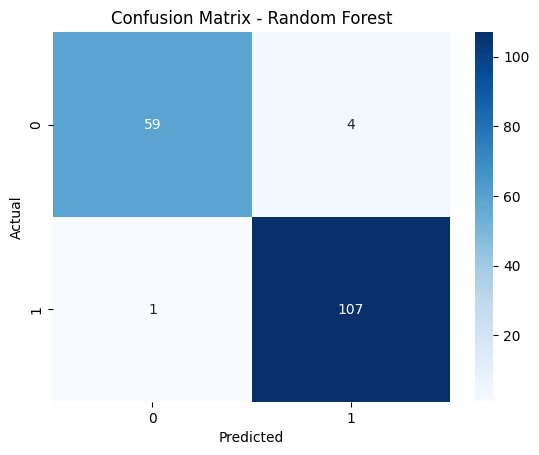

In [2]:
# 35. Train a Random Forest Classifier and visualize the confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [34]:
# 36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load a multiclass dataset with good class balance
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define base learners
base_learners = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True))
]

# Define meta learner
meta_learner = LogisticRegression(max_iter=500)

# Create and train Stacking Classifier
stack_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)
stack_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = stack_model.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred))



Stacking Classifier Accuracy: 0.9333333333333333


In [9]:
# 37. Train a Random Forest Classifier and print the top 5 most important features

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = importances.argsort()[::-1][:5]

feature_names = load_breast_cancer().feature_names
print("Top 5 Important Features:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


Top 5 Important Features:
mean perimeter: 0.1235
mean symmetry: 0.1216
mean area: 0.1158
mean compactness: 0.1149
mean fractal dimension: 0.1137


In [25]:
# 38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-Score

from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Load a multiclass dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Bagging Classifier
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

# Use 'macro' average for multiclass metrics
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred, average='macro'))



Precision (macro): 1.0
Recall (macro): 1.0
F1-Score (macro): 1.0


In [12]:
# 39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy

for depth in [2, 5, 10, None]:
    model = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"Max Depth = {depth}: Accuracy = {acc:.4f}")


Max Depth = 2: Accuracy = 0.0000
Max Depth = 5: Accuracy = 0.0075
Max Depth = 10: Accuracy = 0.0000
Max Depth = None: Accuracy = 0.0075


In [24]:
# 40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance

from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load diabetes dataset for regression
X, y = load_diabetes(return_X_y=True)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.3, random_state=42)

# Try different base estimators
for base in [DecisionTreeRegressor(), KNeighborsRegressor()]:
    name = base.__class__.__name__
    bag = BaggingRegressor(estimator=base, n_estimators=10, random_state=42)
    bag.fit(X_train_r, y_train_r)
    pred = bag.predict(X_test_r)
    mse = mean_squared_error(y_test_r, pred)
    print(f"{name} as base estimator --> MSE: {mse:.2f}")



DecisionTreeRegressor as base estimator --> MSE: 3237.53
KNeighborsRegressor as base estimator --> MSE: 3245.51


In [23]:
# 41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load binary classification data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_proba = rf.predict_proba(X_test)[:, 1]

# Calculate and print ROC-AUC score
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


ROC-AUC Score: 0.9968400940623163


In [22]:
# 42. Train a Bagging Classifier and evaluate its performance using cross-validation

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

# Load binary classification dataset
X, y = load_breast_cancer(return_X_y=True)

# Use `estimator` instead of `base_estimator`
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Evaluate with cross-validation
scores = cross_val_score(bag, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", scores)
print("Average Accuracy:", scores.mean())



Cross-Validation Accuracy Scores: [0.9122807  0.92105263 0.98245614 0.95614035 1.        ]
Average Accuracy: 0.9543859649122808


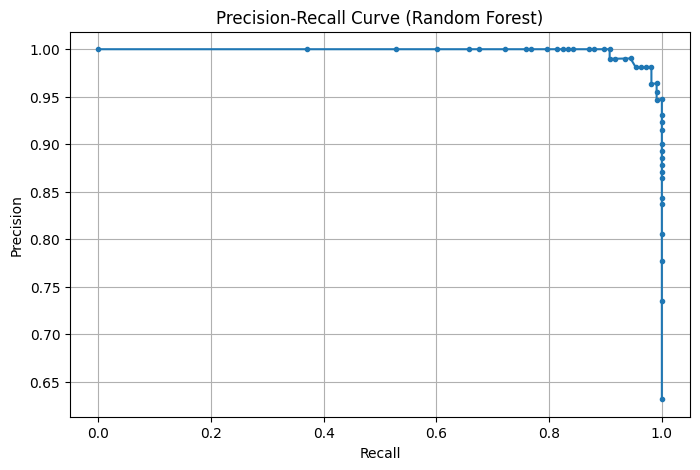

In [21]:
# 43. Train a Random Forest Classifier and plot the Precision-Recall curve (Binary Classification)

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Load binary classification data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get prediction probabilities for the positive class
probs = rf.predict_proba(X_test)[:, 1]

# Compute precision-recall values
precision, recall, _ = precision_recall_curve(y_test, probs)

# Plot
plt.figure(figsize=(8,5))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest)')
plt.grid(True)
plt.show()


In [35]:
# 44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load a clean binary classification dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define base and meta estimators
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]
meta_model = LogisticRegression(max_iter=1000)

# Define and train stacking classifier
stack_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stack_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = stack_model.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred))



Stacking Classifier Accuracy: 0.935672514619883


In [29]:
# 45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance (scikit-learn ≥1.2)

from sklearn.datasets import load_diabetes
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Loop through different bootstrap settings
for bootstrap_setting in [True, False]:
    model = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=10,
        bootstrap=bootstrap_setting,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Bootstrap = {bootstrap_setting} --> MSE: {mse:.2f}")




Bootstrap = True --> MSE: 3237.53
Bootstrap = False --> MSE: 5139.49
